In [1]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
sid = SentimentIntensityAnalyzer()

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'processed_clean_data.csv')

#  Sentiment Analysis using textblob 

##  ON RAW UNprocessed Data

In [3]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment #Sample check

Sentiment(polarity=-0.2, subjectivity=0.0)

<AxesSubplot:>

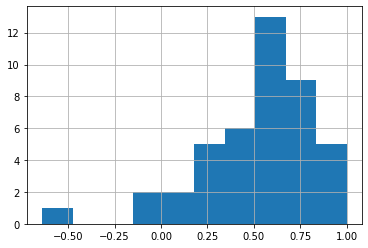

In [4]:

def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score_textblob']=df['title_reveiws'].apply(lambda x : polarity(x))
df['polarity_score_textblob'].hist()

In [5]:
df.head(2)

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,polarity_score_textblob
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.068182
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.525000


<AxesSubplot:>

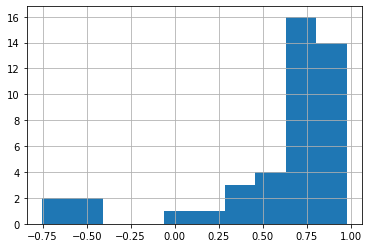

In [6]:
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)['compound']
    
    return ss
    #return ss
    #return np.argmax(list(ss.values())[:-1])
    
df['polarity_score_vader']=df['title_reveiws'].apply(lambda x : get_vader_score(x))
df['polarity_score_vader'].hist()

In [7]:
df

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,polarity_score_textblob,polarity_score_vader
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.068182,-0.4404
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.525000,0.6115
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4,0.600000,0.6808
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8,0.700000,0.7003
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17,0.850000,0.7906
5,Anita Kochhar,4.0,Gentle on gums,Have sensitive gums and found other toothpast...,Gentle on gums Have sensitive gums and found ...,gentle gum sensitive gum found toothpaste irri...,95,58,0.108750,0.4576
6,G.l.babu,5.0,Good,Very good,Good Very good,good,14,4,0.805000,0.7264
7,Deokant singh,4.0,Good,Like,Good Like,good like,9,9,0.700000,0.6597
8,Savita sharma,4.0,Normal toothpaste,Just taste like termaric nothing special and d...,Normal toothpaste Just taste like termaric not...,normal toothpaste taste like termaric nothing ...,152,128,0.251429,0.7930
9,SivaRam,3.0,OK,Not so effective...,OK Not so effective...,not effective,22,13,0.550000,0.4466


In [8]:
def sentiment_tag(x):
    if x<-0.05:
        return 'NEGATIVE'
    elif x >0.05:
        return 'POSITIVE'
    else:
        return 'NEUTRAL'

In [9]:
df['polarity_tag'] = df['polarity_score_textblob'].apply(sentiment_tag)
df

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,polarity_score_textblob,polarity_score_vader,polarity_tag
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.068182,-0.4404,POSITIVE
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.525000,0.6115,POSITIVE
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4,0.600000,0.6808,POSITIVE
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8,0.700000,0.7003,POSITIVE
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17,0.850000,0.7906,POSITIVE
5,Anita Kochhar,4.0,Gentle on gums,Have sensitive gums and found other toothpast...,Gentle on gums Have sensitive gums and found ...,gentle gum sensitive gum found toothpaste irri...,95,58,0.108750,0.4576,POSITIVE
6,G.l.babu,5.0,Good,Very good,Good Very good,good,14,4,0.805000,0.7264,POSITIVE
7,Deokant singh,4.0,Good,Like,Good Like,good like,9,9,0.700000,0.6597,POSITIVE
8,Savita sharma,4.0,Normal toothpaste,Just taste like termaric nothing special and d...,Normal toothpaste Just taste like termaric not...,normal toothpaste taste like termaric nothing ...,152,128,0.251429,0.7930,POSITIVE
9,SivaRam,3.0,OK,Not so effective...,OK Not so effective...,not effective,22,13,0.550000,0.4466,POSITIVE


In [10]:
df['vader_tag'] = df['polarity_score_vader'].apply(sentiment_tag)
df

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,polarity_score_textblob,polarity_score_vader,polarity_tag,vader_tag
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.068182,-0.4404,POSITIVE,NEGATIVE
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.525000,0.6115,POSITIVE,POSITIVE
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4,0.600000,0.6808,POSITIVE,POSITIVE
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8,0.700000,0.7003,POSITIVE,POSITIVE
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17,0.850000,0.7906,POSITIVE,POSITIVE
5,Anita Kochhar,4.0,Gentle on gums,Have sensitive gums and found other toothpast...,Gentle on gums Have sensitive gums and found ...,gentle gum sensitive gum found toothpaste irri...,95,58,0.108750,0.4576,POSITIVE,POSITIVE
6,G.l.babu,5.0,Good,Very good,Good Very good,good,14,4,0.805000,0.7264,POSITIVE,POSITIVE
7,Deokant singh,4.0,Good,Like,Good Like,good like,9,9,0.700000,0.6597,POSITIVE,POSITIVE
8,Savita sharma,4.0,Normal toothpaste,Just taste like termaric nothing special and d...,Normal toothpaste Just taste like termaric not...,normal toothpaste taste like termaric nothing ...,152,128,0.251429,0.7930,POSITIVE,POSITIVE
9,SivaRam,3.0,OK,Not so effective...,OK Not so effective...,not effective,22,13,0.550000,0.4466,POSITIVE,POSITIVE


POSITIVE    40
NEUTRAL      2
NEGATIVE     1
Name: polarity_tag, dtype: int64


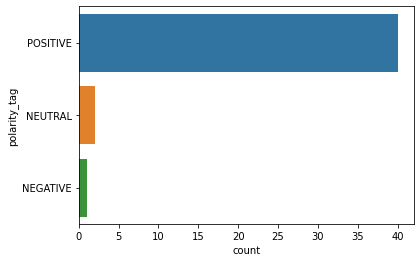

In [11]:
import seaborn as sns
sns.countplot(data=df,y='polarity_tag')
print(df['polarity_tag'].value_counts())

POSITIVE    38
NEGATIVE     4
NEUTRAL      1
Name: vader_tag, dtype: int64


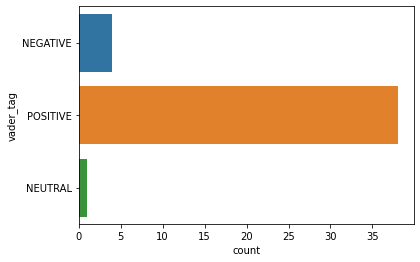

In [12]:
sns.countplot(data=df,y='vader_tag')
print(df['vader_tag'].value_counts())

In [13]:
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    
    return ss
    #return np.argmax(list(ss.values())[:-1])



In [14]:
get_vader_score('Earthquake death toll crosses 24000')

{'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'compound': -0.5994}

##  ON Processed_clean_data

In [15]:
df.columns

Index(['name', 'rating', 'title', 'reviews', 'title_reveiws', 'clean_text',
       'Length_of_title_review', 'Length_of_clean_text',
       'polarity_score_textblob', 'polarity_score_vader', 'polarity_tag',
       'vader_tag'],
      dtype='object')

<AxesSubplot:>

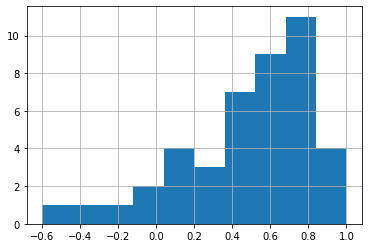

In [16]:

def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score_textblob']=df['clean_text'].apply(lambda x : polarity(x))
df['polarity_score_textblob'].hist()

In [17]:
df.head()

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,polarity_score_textblob,polarity_score_vader,polarity_tag,vader_tag
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.136364,-0.4404,POSITIVE,NEGATIVE
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.525000,0.6115,POSITIVE,POSITIVE
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4,0.600000,0.6808,POSITIVE,POSITIVE
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8,0.700000,0.7003,POSITIVE,POSITIVE
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17,0.850000,0.7906,POSITIVE,POSITIVE


<AxesSubplot:>

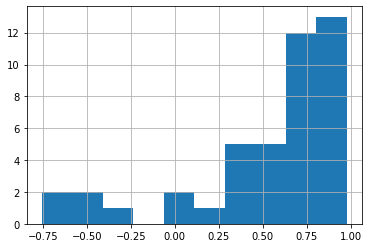

In [18]:
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)['compound']
    
    return ss
    #return ss
    #return np.argmax(list(ss.values())[:-1])
    
df['polarity_score_vader']=df['clean_text'].apply(lambda x : get_vader_score(x))
df['polarity_score_vader'].hist()

In [19]:
df

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,polarity_score_textblob,polarity_score_vader,polarity_tag,vader_tag
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.136364,-0.4404,POSITIVE,NEGATIVE
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.525000,0.6115,POSITIVE,POSITIVE
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4,0.600000,0.4215,POSITIVE,POSITIVE
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8,0.700000,0.4404,POSITIVE,POSITIVE
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17,0.850000,0.7906,POSITIVE,POSITIVE
5,Anita Kochhar,4.0,Gentle on gums,Have sensitive gums and found other toothpast...,Gentle on gums Have sensitive gums and found ...,gentle gum sensitive gum found toothpaste irri...,95,58,0.166667,0.4019,POSITIVE,POSITIVE
6,G.l.babu,5.0,Good,Very good,Good Very good,good,14,4,0.700000,0.4404,POSITIVE,POSITIVE
7,Deokant singh,4.0,Good,Like,Good Like,good like,9,9,0.700000,0.6597,POSITIVE,POSITIVE
8,Savita sharma,4.0,Normal toothpaste,Just taste like termaric nothing special and d...,Normal toothpaste Just taste like termaric not...,normal toothpaste taste like termaric nothing ...,152,128,0.251429,0.7930,POSITIVE,POSITIVE
9,SivaRam,3.0,OK,Not so effective...,OK Not so effective...,not effective,22,13,-0.300000,-0.3724,POSITIVE,POSITIVE


In [20]:
def sentiment_tag(x):
    if x<-0.05:
        return 'NEGATIVE'
    elif x >0.05:
        return 'POSITIVE'
    else:
        return 'NEUTRAL'

In [21]:
df['polarity_tag'] = df['polarity_score_textblob'].apply(sentiment_tag)
df

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,polarity_score_textblob,polarity_score_vader,polarity_tag,vader_tag
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.136364,-0.4404,POSITIVE,NEGATIVE
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.525000,0.6115,POSITIVE,POSITIVE
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4,0.600000,0.4215,POSITIVE,POSITIVE
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8,0.700000,0.4404,POSITIVE,POSITIVE
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17,0.850000,0.7906,POSITIVE,POSITIVE
5,Anita Kochhar,4.0,Gentle on gums,Have sensitive gums and found other toothpast...,Gentle on gums Have sensitive gums and found ...,gentle gum sensitive gum found toothpaste irri...,95,58,0.166667,0.4019,POSITIVE,POSITIVE
6,G.l.babu,5.0,Good,Very good,Good Very good,good,14,4,0.700000,0.4404,POSITIVE,POSITIVE
7,Deokant singh,4.0,Good,Like,Good Like,good like,9,9,0.700000,0.6597,POSITIVE,POSITIVE
8,Savita sharma,4.0,Normal toothpaste,Just taste like termaric nothing special and d...,Normal toothpaste Just taste like termaric not...,normal toothpaste taste like termaric nothing ...,152,128,0.251429,0.7930,POSITIVE,POSITIVE
9,SivaRam,3.0,OK,Not so effective...,OK Not so effective...,not effective,22,13,-0.300000,-0.3724,NEGATIVE,POSITIVE


In [22]:
df['vader_tag'] = df['polarity_score_vader'].apply(sentiment_tag)
df

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,polarity_score_textblob,polarity_score_vader,polarity_tag,vader_tag
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.136364,-0.4404,POSITIVE,NEGATIVE
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.525000,0.6115,POSITIVE,POSITIVE
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4,0.600000,0.4215,POSITIVE,POSITIVE
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8,0.700000,0.4404,POSITIVE,POSITIVE
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17,0.850000,0.7906,POSITIVE,POSITIVE
5,Anita Kochhar,4.0,Gentle on gums,Have sensitive gums and found other toothpast...,Gentle on gums Have sensitive gums and found ...,gentle gum sensitive gum found toothpaste irri...,95,58,0.166667,0.4019,POSITIVE,POSITIVE
6,G.l.babu,5.0,Good,Very good,Good Very good,good,14,4,0.700000,0.4404,POSITIVE,POSITIVE
7,Deokant singh,4.0,Good,Like,Good Like,good like,9,9,0.700000,0.6597,POSITIVE,POSITIVE
8,Savita sharma,4.0,Normal toothpaste,Just taste like termaric nothing special and d...,Normal toothpaste Just taste like termaric not...,normal toothpaste taste like termaric nothing ...,152,128,0.251429,0.7930,POSITIVE,POSITIVE
9,SivaRam,3.0,OK,Not so effective...,OK Not so effective...,not effective,22,13,-0.300000,-0.3724,NEGATIVE,NEGATIVE


POSITIVE    38
NEGATIVE     3
NEUTRAL      2
Name: polarity_tag, dtype: int64


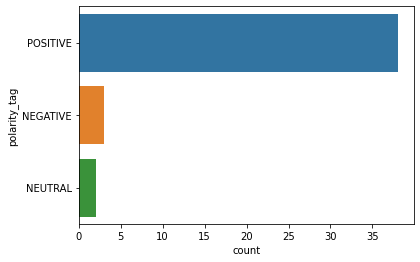

In [23]:
import seaborn as sns
sns.countplot(data=df,y='polarity_tag')
print(df['polarity_tag'].value_counts())

POSITIVE    36
NEGATIVE     5
NEUTRAL      2
Name: vader_tag, dtype: int64


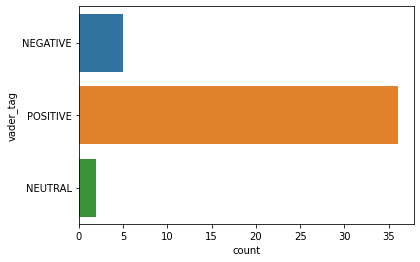

In [24]:
sns.countplot(data=df,y='vader_tag')
print(df['vader_tag'].value_counts())

In [25]:
df.to_csv('SENTIMENT_ANALYSIS_using Polarity and vader using textblob.csv',index=False)